# Comparison of Support Vector Classifier and Multinomial Naive Bayes for Breast Cancer Diagnosis

## Project Overview:
This project aims to compare the performance of Support Vector Classifier (SVC) and Multinomial Naive Bayes (MNB) algorithms in diagnosing breast cancer using the Wisconsin Breast Cancer dataset. The project involves data preprocessing, exploratory data analysis, feature selection, model training, hyperparameter tuning, and performance evaluation of both classifiers. The goal is to determine which classifier performs better in terms of accuracy and other evaluation metrics.

## Steps Involved in the Project:

1. **Data Loading and Inspection:**
   - Load the Wisconsin Breast Cancer dataset.
   - Inspect the dataset for shape, column names, missing values, and data types.

2. **Data Cleaning:**
   - Drop unnecessary columns such as 'id' and 'Unnamed: 32'.
   - Map diagnosis labels ('M' and 'B') to binary values (1 and 0).

3. **Exploratory Data Analysis (EDA):**
   - Plot the distribution of each feature using KDE plots.
   - Create a bar plot for the diagnosis column.
   - Calculate and visualize the correlation matrix using a heatmap.

4. **Feature Selection:**
   - Identify features highly correlated with the diagnosis variable.

5. **Model Training and Evaluation:**
   - **Support Vector Classifier (SVC):**
     - Train and evaluate an SVC model with default parameters on the full feature set.
     - Perform grid search for hyperparameter tuning.
     - Train and evaluate the SVC model with the best parameters on both the full feature set and the selected correlated features.
   
   - **Multinomial Naive Bayes (MNB):**
     - Train and evaluate an MNB model with default parameters on the full feature set.
     - Perform grid search for hyperparameter tuning.
     - Train and evaluate the MNB model with the best parameters on both the full feature set and the selected correlated features.

6. **Model Performance Comparison:**
   - Combine the performance results of SVC and MNB models into a single bar plot for visualization.
   - Compare the accuracy and other evaluation metrics of the models.

### Data Loading, Inspection and Data Cleaning:

**About the Data Set**


A popular [dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) in machine learning literature, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

These are the features (feature 2 is our dependent variable):

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3) 32 Features are computed for each cell nucleus.

 For example:
- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Load the dataset
df = pd.read_csv("./breast-cancer-wisconsin.csv")
print(df.shape)

(569, 33)


In [3]:
# Display column names
columns_names = df.columns.tolist()
print(columns_names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [4]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis (EDA):

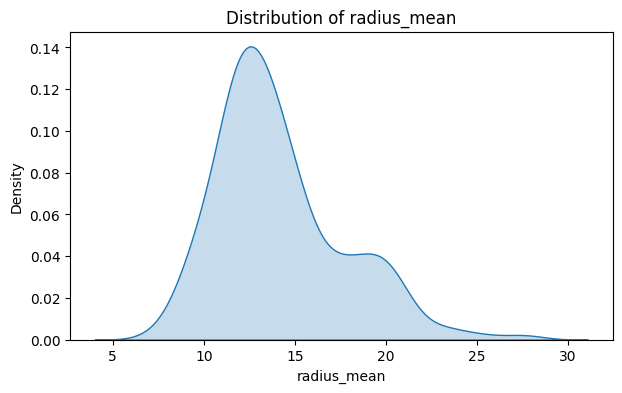

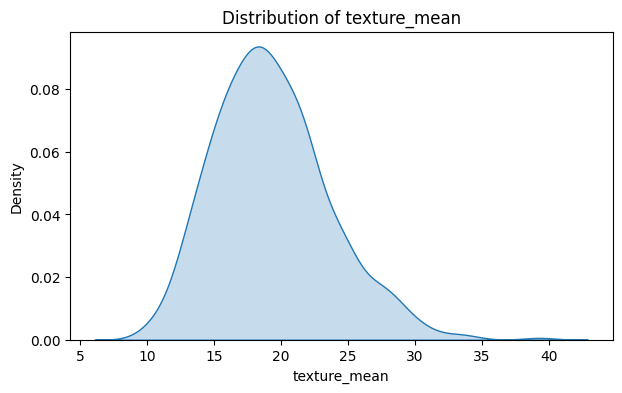

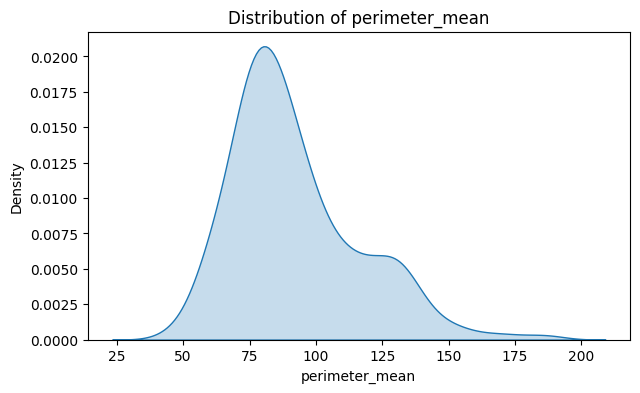

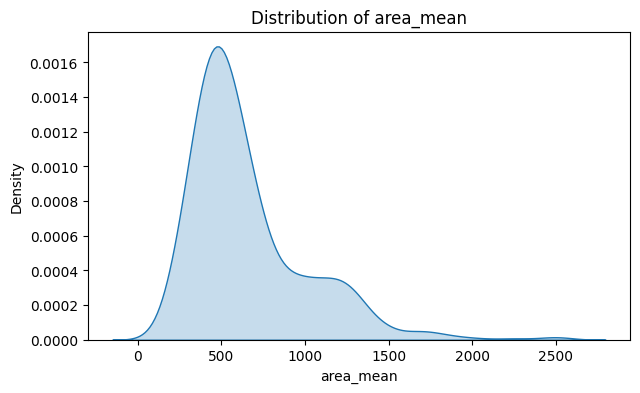

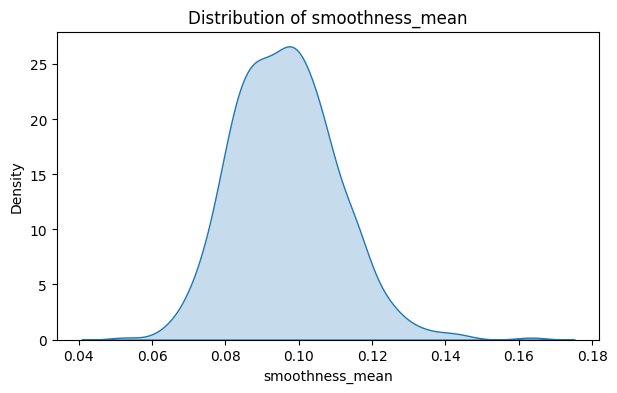

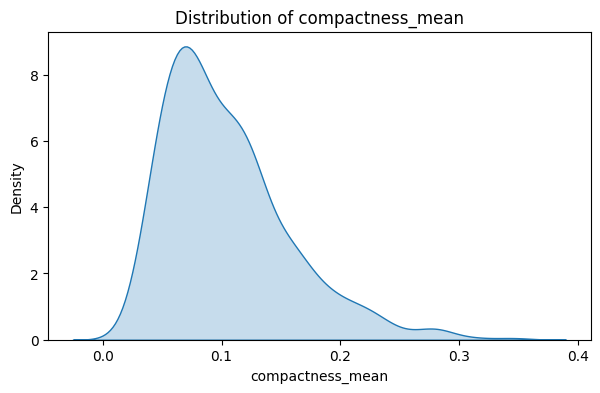

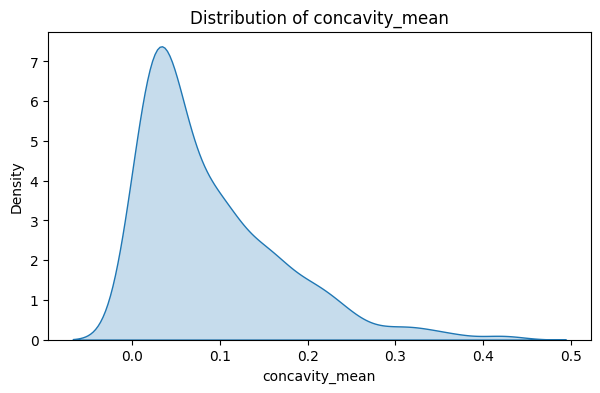

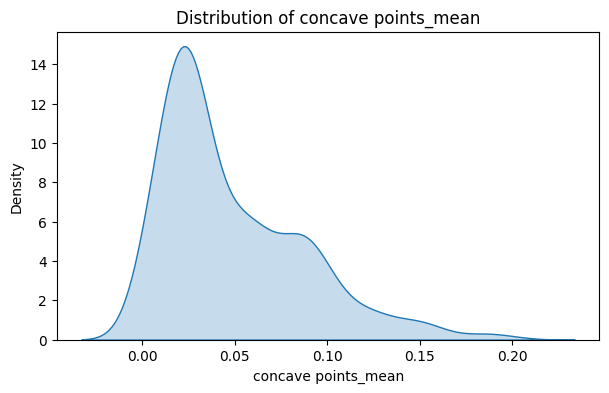

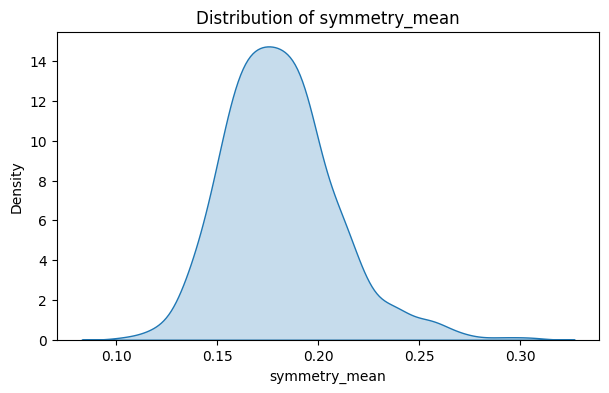

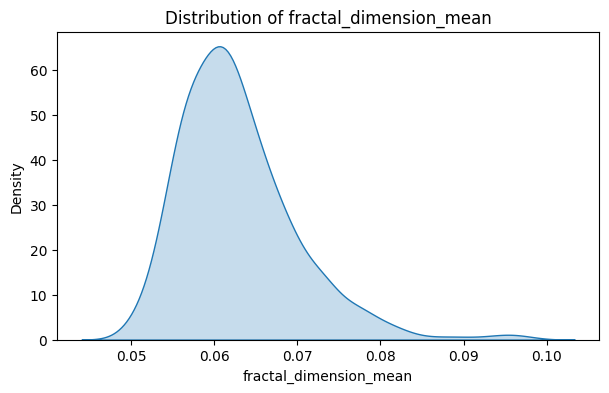

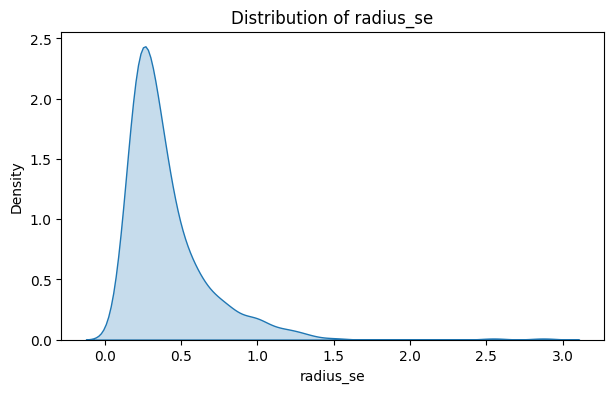

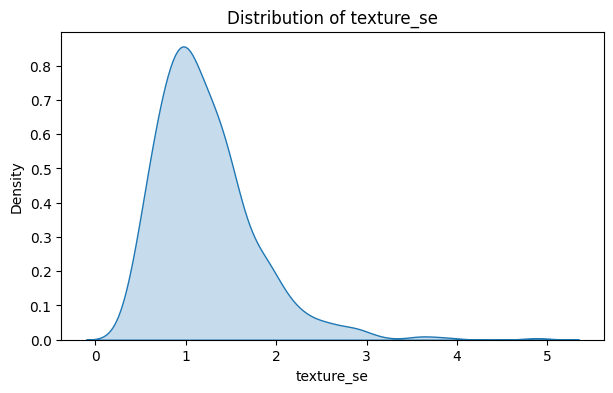

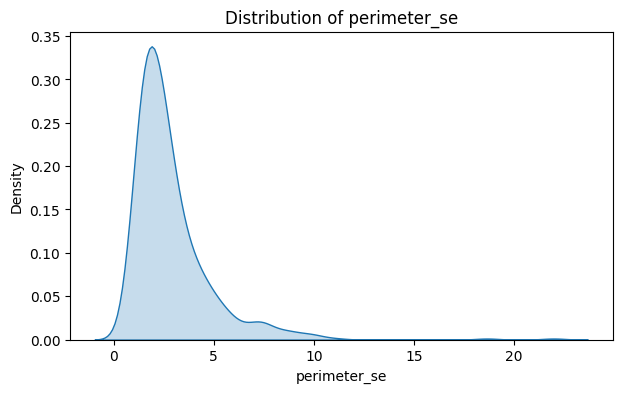

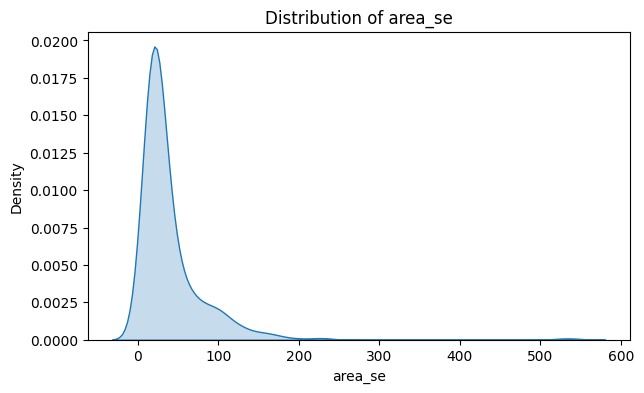

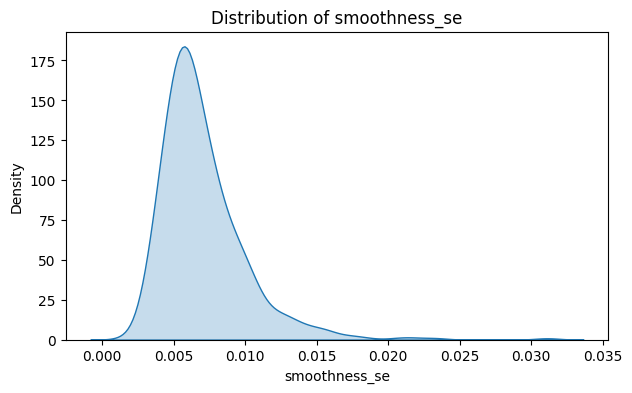

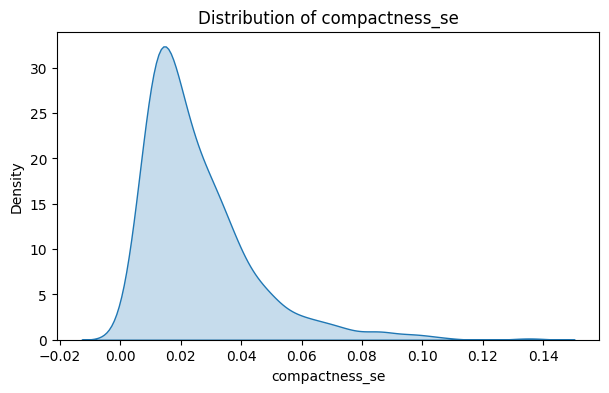

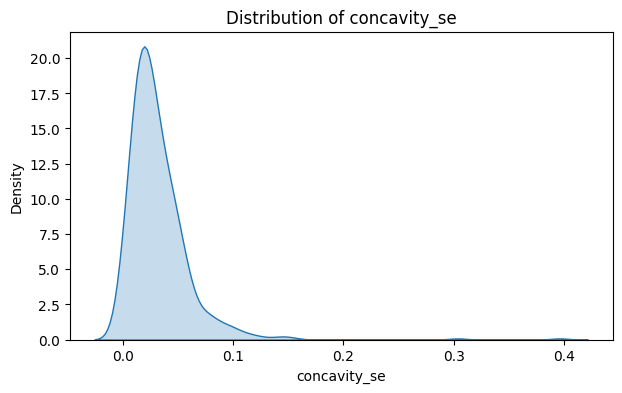

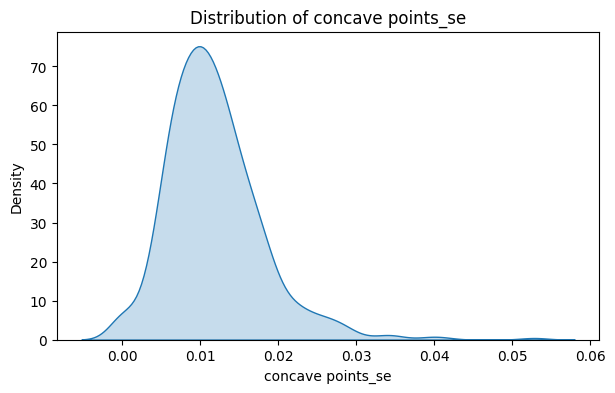

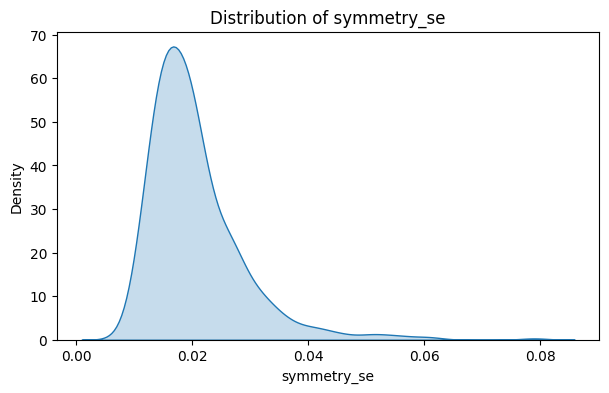

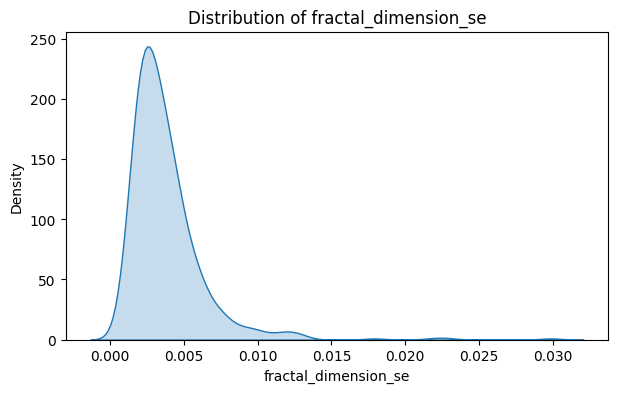

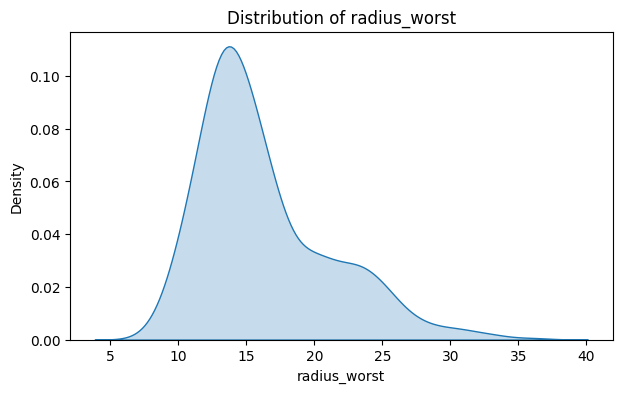

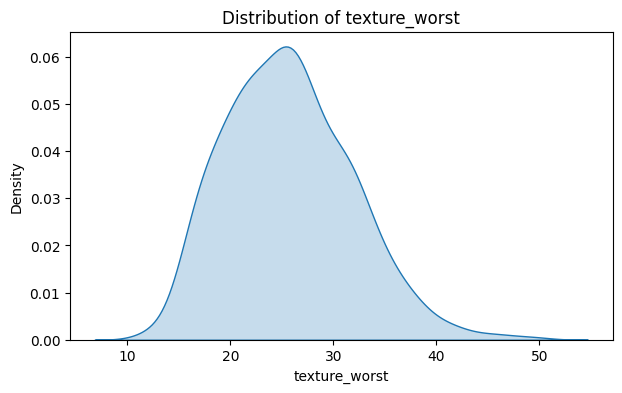

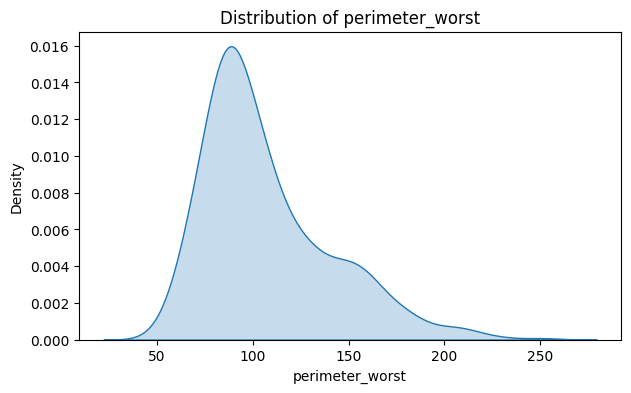

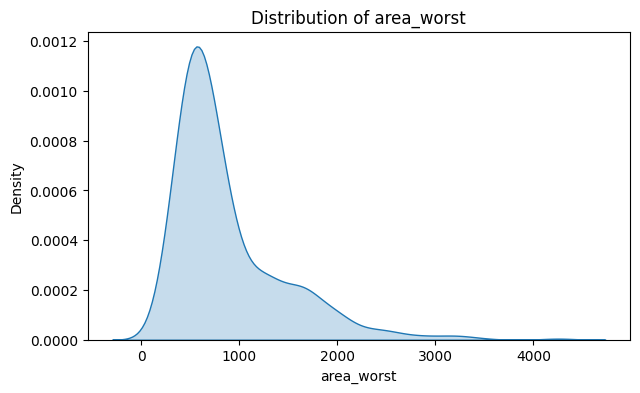

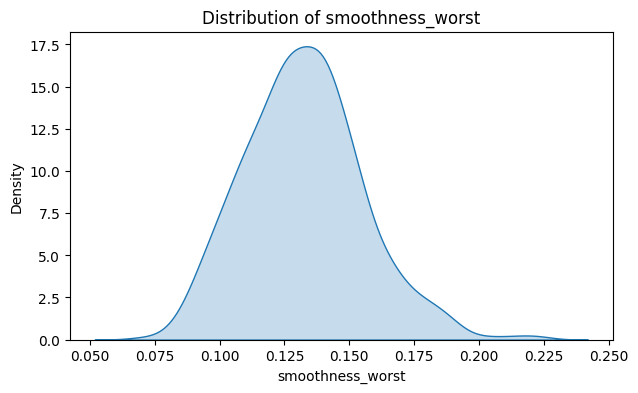

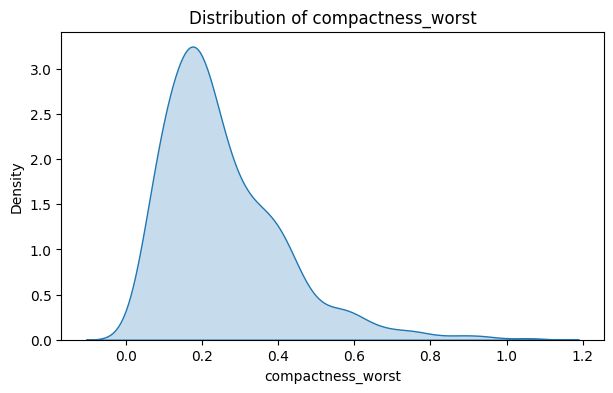

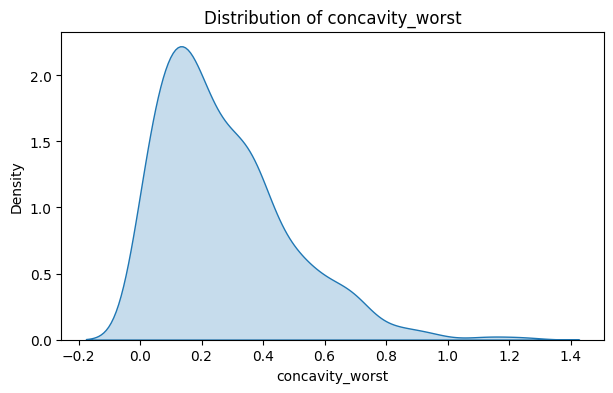

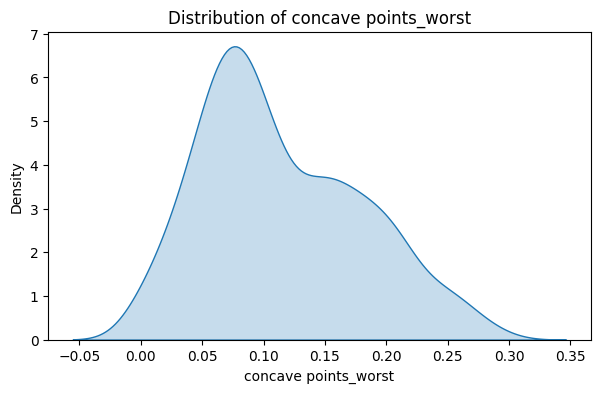

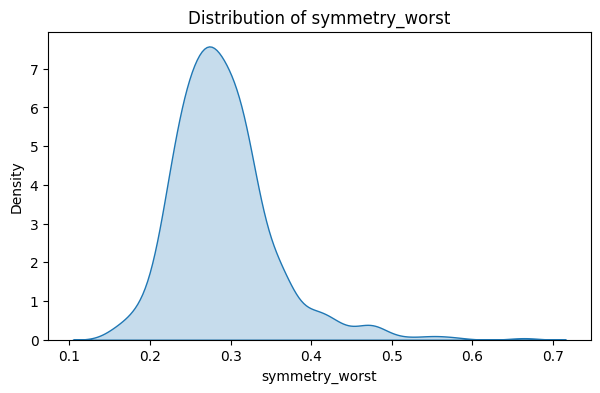

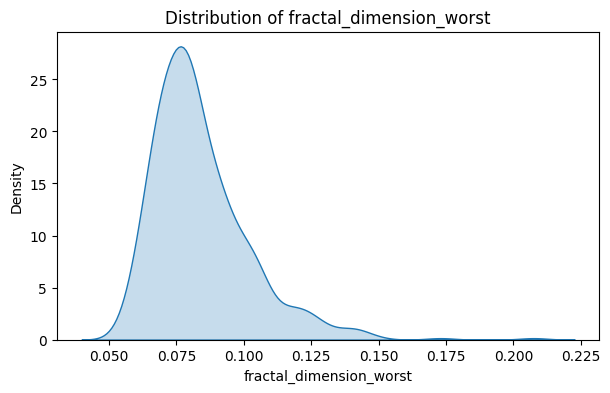

In [6]:
# Plotting the distribution of each feature
features_to_plot = df.drop('diagnosis', axis=1)

for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<Axes: xlabel='diagnosis', ylabel='None'>

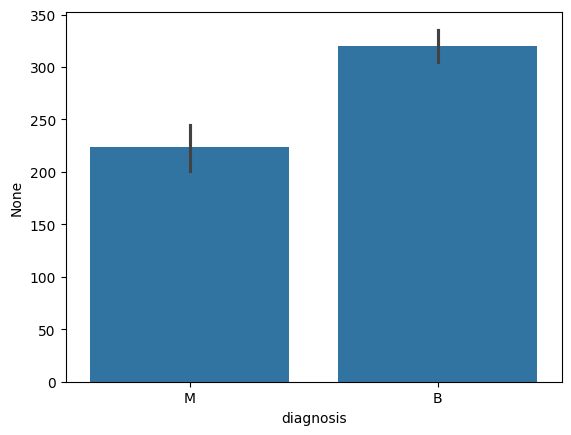

In [7]:
# Bar plot of diagnosis
sns.barplot(x="diagnosis", y=df.diagnosis.index, data=df)

**Observation:** Data not balanced, but not super-imbalanced, either

In [8]:
# Map diagnosis to binary values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

### Correlation Matrix

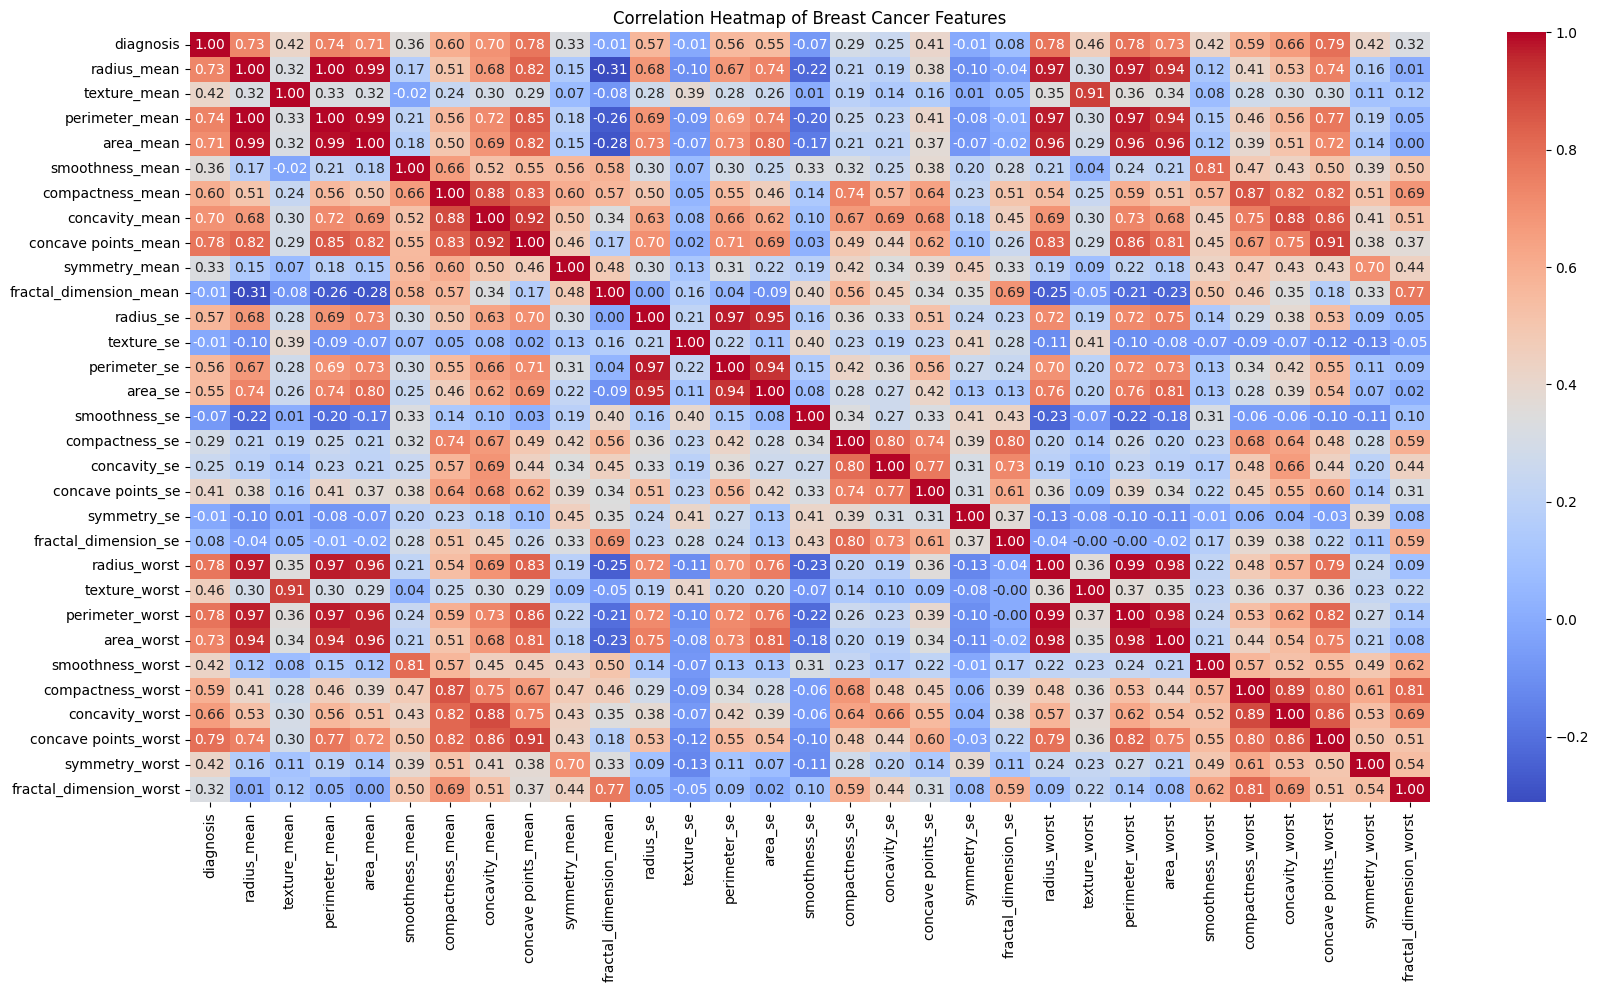

In [9]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

### Feature Selection:


Based on the correlation criterion with a threshold of 0.5 with the target variable, the following features have been selected for inclusion in the model

In [10]:
# Extract features highly correlated with the diagnosis
correlated_features = correlation_matrix.index[correlation_matrix["diagnosis"].abs() > 0.5].tolist()
correlated_features.remove('diagnosis')  # Ensure 'diagnosis' is not included
print(correlated_features)

['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [11]:
# Full feature set
features_full = df.drop('diagnosis', axis=1)
target = df['diagnosis']

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_full)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

((455, 30), (114, 30), (455,), (114,))


### Model Training and Evaluation:

#### SVC

##### SVC with full features and default parameters

Accuracy (default parameters): 97.36842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



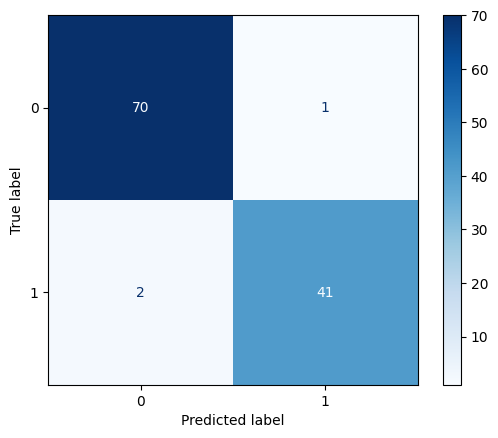

In [12]:
# Training and evaluating SVC with default parameters
svc_model_default = SVC()
svc_model_default.fit(X_train, y_train)

# Predicting the test set results
y_pred_default = svc_model_default.predict(X_test)

# Evaluating the model
print("Accuracy (default parameters):", accuracy_score(y_test, y_pred_default) * 100)
print(classification_report(y_test, y_pred_default))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_default, cmap='Blues')

**Accuracy: 97.36**

The confusion matrix is to visualise the accuracy calculated in more detailed way.

Accuracy is calculated as follows:

Accuracy = TP+TN/(TP+FP+FN+TN)

TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative

True negatives (correctly predicted benign): 70

False positives (benign cases incorrectly predicted as malignant): 1

False negatives (malignant cases incorrectly predicted as benign): 2

True positives (correctly predicted malignant): 41

In [13]:
# Function to train and evaluate SVM with a given set of features
def train_evaluate_svm(features, target, param_grid):
    # Scaling the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Splitting the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
    print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    # Grid search for best hyperparameters
    svc = SVC()
    grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(best_params, best_score)
    
    # Train with best parameters
    svc_model = SVC(**best_params)
    svc_model.fit(X_train, y_train)
    
    # Predicting the test set results
    y_pred = svc_model.predict(X_test)
    
    # Evaluating the model
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    
    return best_params, best_score

##### SVC with full features and hyperparameter tuning

In [14]:
# Full feature set
features_full = df.drop('diagnosis', axis=1)
target = df['diagnosis']

# Hyperparameter grid
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

Training with full feature set:
((455, 30), (114, 30), (455,), (114,))
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=

({'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, 0.9758241758241759)

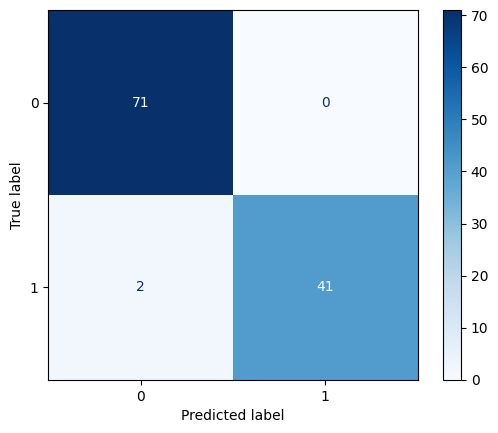

In [15]:
# Train and evaluate SVM on full feature set
print("Training with full feature set:")
train_evaluate_svm(features_full, target, param_grid_svc)

**Accuracy: 98.24**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 2

True positives (correctly predicted malignant): 41

##### SVC with selected features and hyperparameter tuning

Training with highly correlated features:
((455, 15), (114, 15), (455,), (114,))
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9538461538461538)

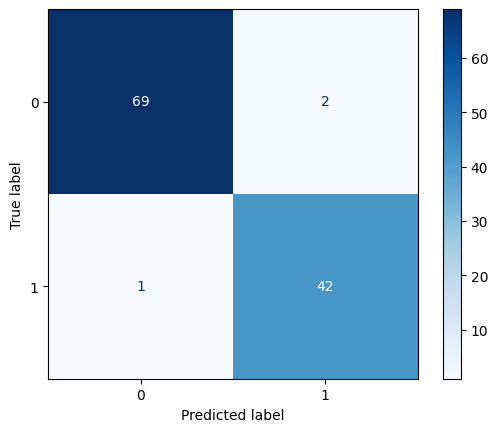

In [16]:
# Feature set with high correlation to diagnosis
features_corr = df[correlated_features]

# Train and evaluate SVM on correlated feature set
print("Training with highly correlated features:")
train_evaluate_svm(features_corr, target, param_grid_svc)

**Accuracy: 97.36**

True negatives (correctly predicted benign): 69

False positives (benign cases incorrectly predicted as malignant): 2

False negatives (malignant cases incorrectly predicted as benign): 1

True positives (correctly predicted malignant): 42

**Accuracies**

- SVC with all features(30) and default hyperparameters: 97.3% accuracy.
- SVC with selected features(15) and tuned hyperparameters: 97.3% accuracy.
- SVC with all features(30) and tuned hyperparameters: 98.2% accuracy.

#### Naive Bayes Classifier

##### MNB with full feature set and default parameters

Accuracy (default parameters): 93.85964912280701
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



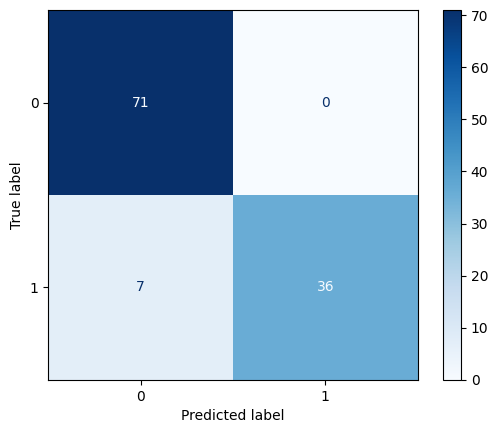

In [17]:
# Naive Bayes Classification
# Separate features and target variable
Features = df.drop('diagnosis', axis=1)
target = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)

# Train and evaluate Multinomial Naive Bayes with default parameters
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy (default parameters):", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

**Accuracy: 93.85**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 7

True positives (correctly predicted malignant): 36

##### MNB with selected feature set and hyperparameter tuning

{'alpha': 100.0} 0.9098901098901099
Accuracy: 94.73684210526315
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



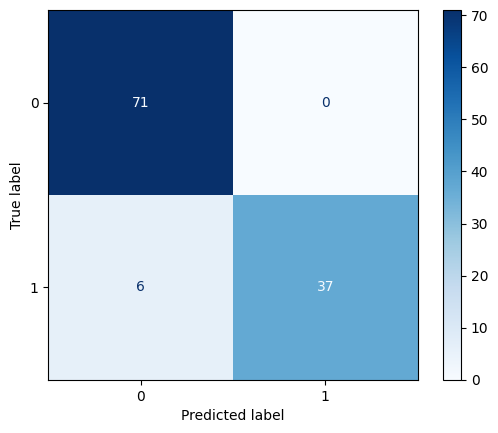

In [18]:
# Selected features
Features_selected = df[correlated_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features_selected, target, test_size=0.2, random_state=42)

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

# Train and evaluate Multinomial Naive Bayes with best parameters
model = MultinomialNB(alpha=best_params['alpha'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

**Accuracy: 94.73**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 6

True positives (correctly predicted malignant): 37

##### MNB with full feature set and hyperparameter tuning

{'alpha': 0.01} 0.8835164835164836
Accuracy: 93.85964912280701
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



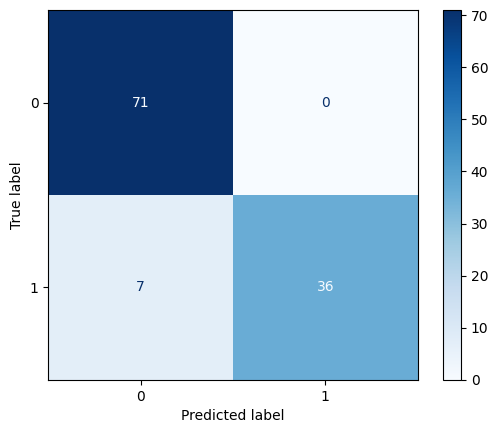

In [19]:
# Full feature set with tuning
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

# Train and evaluate Multinomial Naive Bayes with best parameters
model = MultinomialNB(alpha=best_params['alpha'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

**Accuracy: 93.85964912280701**

True negatives (correctly predicted benign): 71

False positives (benign cases incorrectly predicted as malignant): 0

False negatives (malignant cases incorrectly predicted as benign): 7

True positives (correctly predicted malignant): 36

**Accuracies**
- Multinomial Naive Bayes (MNB) with all features(30) and default hyperparameters: 93.8% accuracy.
- Multinomial Naive Bayes (MNB) with selected features(15) and tuned hyperparameters: 94.7% accuracy.
- Multinomial Naive Bayes (MNB) with all features(30) and tuned hyperparameters: 93.8% accuracy.

### Model Performance Comparison:

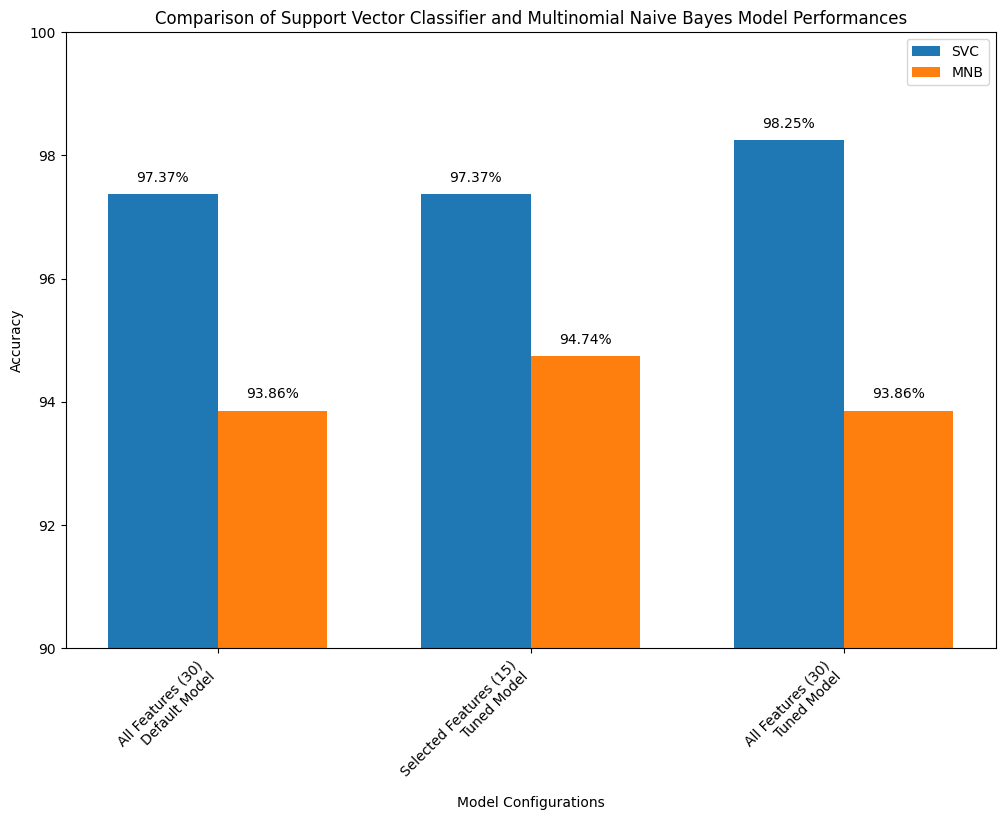

In [20]:
models = [
    'All Features (30)\nDefault Model',
    'Selected Features (15)\nTuned Model',
    'All Features (30)\nTuned Model'
]
svc_accuracies = [97.36842105263158, 97.36842105263158, 98.24561403508771]
mnb_accuracies = [93.85964912280701, 94.73684210526315, 93.85964912280701]

x = np.arange(len(models))
width = 0.35

# Plotting
plt.figure(figsize=(12, 8))
bars1 = plt.bar(x - width/2, svc_accuracies, width, label='SVC')
bars2 = plt.bar(x + width/2, mnb_accuracies, width, label='MNB')

# Labels and Title
plt.xlabel('Model Configurations')
plt.ylabel('Accuracy')
plt.title('Comparison of Support Vector Classifier and Multinomial Naive Bayes Model Performances')
plt.ylim(90, 100)

# Adding text labels
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.2, f'{height:.2f}%', ha='center')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.2, f'{height:.2f}%', ha='center')

# Ticks and legend
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()

# Display the plot
plt.show()


## Conclusion
Based on the analysis and comparison, the Support Vector Classifier (SVC) demonstrated higher accuracy and better performance metrics compared to the Multinomial Naive Bayes (MNB) for diagnosing breast cancer. Specifically, the tuned SVC model with all features achieved the highest accuracy of 98.25%, while the tuned MNB model with selected features achieved an accuracy of 94.74%. This suggests that SVC is a more suitable classifier for this dataset, especially when using optimal hyperparameters and feature selection techniques.